In [29]:
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

import acquire_zillow


# Statistical Tests
import scipy.stats as stats

In [2]:
df = acquire_zillow.get_zillow_data()
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,6.037124e+13,0.006940,2017-01-01,Central,None,None,Central,Condominium,None,None


In [3]:
df.shape

(77574, 68)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77574 entries, 0 to 77573
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77574 non-null  int64  
 1   parcelid                      77574 non-null  int64  
 2   airconditioningtypeid         25006 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77574 non-null  float64
 6   bedroomcnt                    77574 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49808 non-null  float64
 9   calculatedbathnbr             76959 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6035 non-null   float64
 12  calculatedfinishedsquarefeet  77374 non-null  float64
 13  f

In [5]:
df = acquire_zillow.wrangle_zillow_codeup(df)
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
0,14297519,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,...,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Orange
1,17052889,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,...,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Ventura
2,14186244,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,21412.0,...,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,Orange
3,12177905,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,396551.0,...,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,Los_Angeles
4,10887214,3.0,3.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,12447.0,...,0.0,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,0.006940,2017-01-01,Los_Angeles


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71991 entries, 0 to 77573
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      71991 non-null  int64  
 1   bathroomcnt                   71991 non-null  float64
 2   bedroomcnt                    71991 non-null  float64
 3   calculatedfinishedsquarefeet  71991 non-null  float64
 4   fips                          71991 non-null  float64
 5   latitude                      71991 non-null  float64
 6   longitude                     71991 non-null  float64
 7   lotsizesquarefeet             71991 non-null  float64
 8   rawcensustractandblock        71991 non-null  float64
 9   regionidcity                  71991 non-null  float64
 10  regionidcounty                71991 non-null  float64
 11  regionidzip                   71991 non-null  float64
 12  roomcnt                       71991 non-null  float64
 13  y

In [7]:
train, validate, test = acquire_zillow.split_data(df)

In [8]:
train.shape, validate.shape, test.shape

((40314, 22), (17278, 22), (14399, 22))

In [17]:
train['LA_County'] = train.county == 'Los_Angeles'
train['Orange_County'] = train.county =='Orange'
train['Ventura_County'] = train.county =='Ventura'

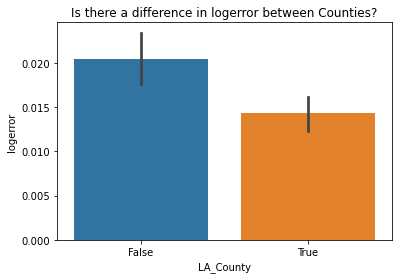

In [23]:
sns.barplot(data=train, y='logerror', x='LA_County')
plt.title("Is there a difference in logerror between Counties?")
plt.show()

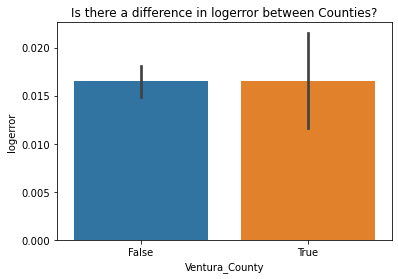

In [24]:
sns.barplot(data=train, y='logerror', x='Ventura_County')
plt.title("Is there a difference in logerror between Counties?")
plt.show()

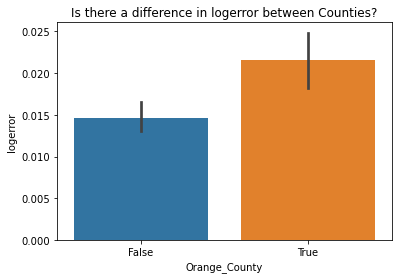

In [25]:
sns.barplot(data=train, y='logerror', x='Orange_County')
plt.title("Is there a difference in logerror between Counties?")
plt.show()

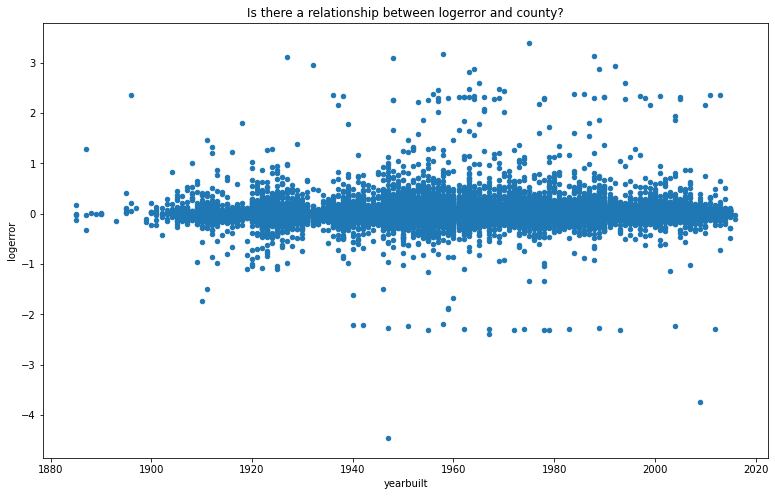

In [30]:
train.plot.scatter(y='logerror', x='yearbuilt', title='Is there a relationship between logerror and county?', figsize=(13, 8))
plt.show()

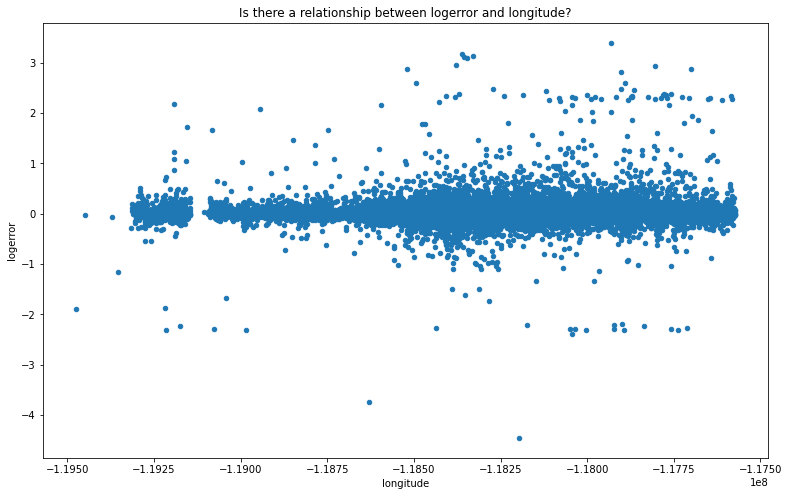

In [31]:
train.plot.scatter(y='logerror', x='longitude', title='Is there a relationship between logerror and longitude?', figsize=(13, 8))
plt.show()

Levene's Test: test for equal variance

    𝐻0 : there is no difference in logerror variance between the two samples
    𝐻𝑎 : there is a difference in logerror variance between the two samples

Levene Test for LA county and logerror

In [32]:
stats.levene(
    train.query('LA_County == 1').logerror,
    train.query('LA_County == 0').logerror,
)

LeveneResult(statistic=17.537415888466345, pvalue=2.823069165496184e-05)

Levene Test for Orange county and logerror

In [33]:
stats.levene(
    train.query('Orange_County == 1').logerror,
    train.query('Orange_County == 0').logerror,
)

LeveneResult(statistic=9.10689421790814, pvalue=0.0025480683242346354)

Levene Test for Ventura county and logerror

In [34]:
stats.levene(
    train.query('Ventura_County == 1').logerror,
    train.query('Ventura_County == 0').logerror,
)

LeveneResult(statistic=5.6125359922795495, pvalue=0.017837121580305957)

## T - Tests
La County

In [36]:
stats.ttest_ind(
    train.query('LA_County == 1').logerror,
    train.query('LA_County == 0').logerror,
    equal_var=True,
)

Ttest_indResult(statistic=-3.560398057670512, pvalue=0.00037071906241348257)

In [38]:
stats.ttest_ind(
    train.query('Orange_County == 1').logerror,
    train.query('Orange_County == 0').logerror,
    equal_var=True,
)

Ttest_indResult(statistic=3.810390108203239, pvalue=0.00013895360970847876)

In [39]:
stats.ttest_ind(
    train.query('Ventura_County == 1').logerror,
    train.query('Ventura_County == 0').logerror,
    equal_var=True,
)

Ttest_indResult(statistic=0.015135093374390502, pvalue=0.9879244785998318)

In [40]:
train = acquire_zillow.yearbuilt_years(train)

In [41]:
train.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county,LA_County,Orange_County,Ventura_County,age
4498,10960738,2.0,3.0,1260.0,6037.0,34163419.0,-118330574.0,7071.0,6.037312e+07,396054.0,...,2016.0,521908.0,7152.10,0.045279,2017-01-20,Los_Angeles,True,False,False,93
31046,11805174,1.0,3.0,684.0,6037.0,34025585.0,-118203690.0,3147.0,6.037205e+07,12447.0,...,2016.0,98225.0,1593.12,0.007009,2017-04-28,Los_Angeles,True,False,False,96
57591,12620102,2.0,3.0,1064.0,6037.0,33814800.0,-118288000.0,313202.0,6.037544e+07,118878.0,...,2016.0,182000.0,3627.94,-0.034113,2017-07-17,Los_Angeles,True,False,False,48
5654,12828086,1.0,1.0,740.0,6037.0,33931700.0,-117987000.0,119250.0,6.037503e+07,14634.0,...,2016.0,129600.0,3097.68,-0.006418,2017-01-26,Los_Angeles,True,False,False,52
41841,12379314,2.0,3.0,1113.0,6037.0,34011821.0,-118128194.0,5114.0,6.037532e+07,17882.0,...,2016.0,259653.0,5171.79,0.117941,2017-05-31,Los_Angeles,True,False,False,80


## Creating an age bin and testing this against logerror

In [45]:
train['age_bin'] = pd.cut(train.age, [0,25, 50, 100])
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
0,14297519,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,...,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Orange
1,17052889,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,...,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Ventura
2,14186244,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,21412.0,...,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,Orange
3,12177905,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,396551.0,...,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,Los_Angeles
4,10887214,3.0,3.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,12447.0,...,0.0,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,0.006940,2017-01-01,Los_Angeles


<AxesSubplot:title={'center':'Distribution of age_bin'}>

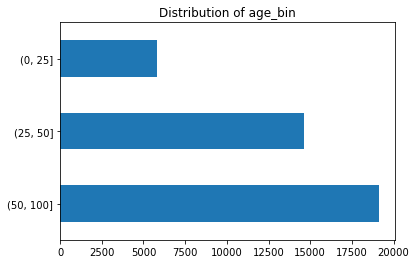

In [46]:
train.age_bin.value_counts().plot.barh(title='Distribution of age_bin')

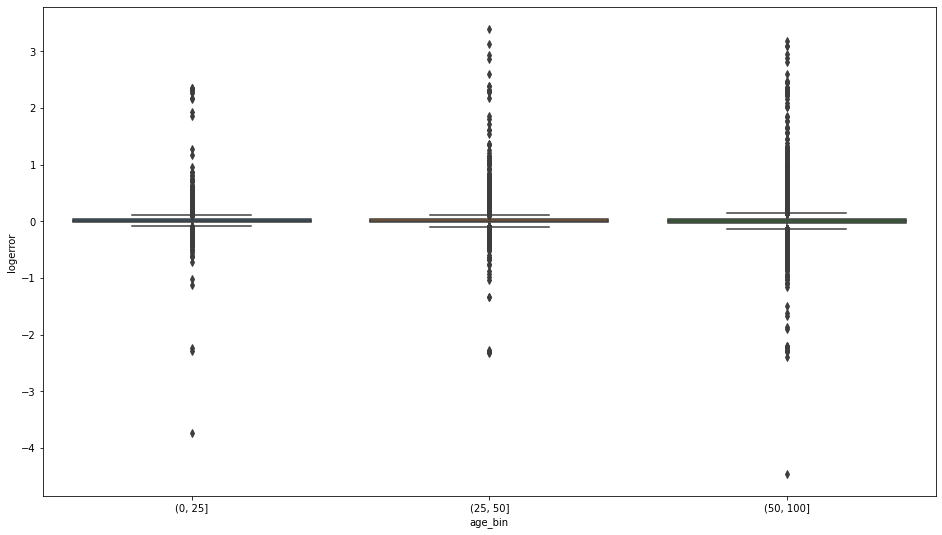

In [49]:
plt.figure(figsize=(16,9))
sns.boxplot(data=train, y='logerror', x='age_bin')
plt.show()

### Stats Tests for age of the home

In [51]:
#H0: Variances are equal
#Ha: Variances are not equal

stats.levene(
    train[train.age <= 40].logerror,
    train[train.age > 40].logerror,
)

LeveneResult(statistic=164.31613615542895, pvalue=1.5279302161322864e-37)

In [52]:
stats.ttest_ind(
    train[train.age <= 40].logerror,
    train[train.age > 40].logerror,
    equal_var=False,
)

Ttest_indResult(statistic=-0.5938895950628514, pvalue=0.5525900467113585)

Low P-Value no relationship

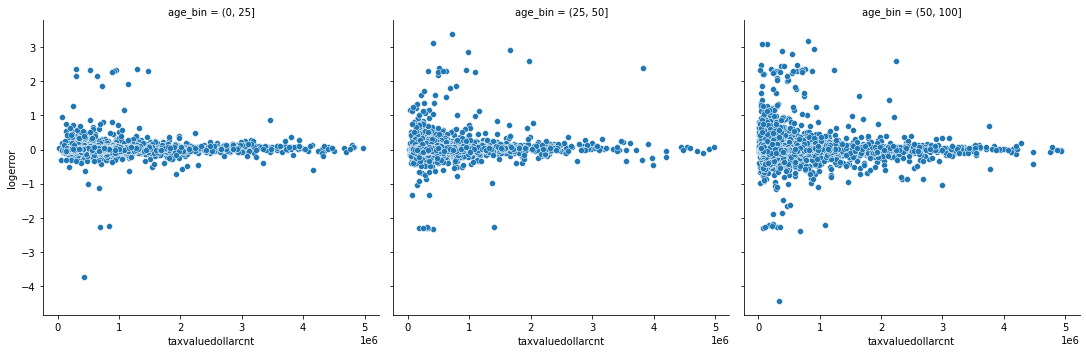

In [88]:
sns.relplot(data=train, y='logerror', x='taxvaluedollarcnt', col='age_bin')

## Creating bins for tax value and seeing it with logerror

In [66]:
train['tax_value_bin'] = pd.cut(train.taxvaluedollarcnt, [0,250000, 500000,750000, 1000000])
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
0,14297519,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,...,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Orange
1,17052889,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,...,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Ventura
2,14186244,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,21412.0,...,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,Orange
3,12177905,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,396551.0,...,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,Los_Angeles
4,10887214,3.0,3.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,12447.0,...,0.0,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,0.006940,2017-01-01,Los_Angeles


<AxesSubplot:title={'center':'Distribution of tax_value_bin'}>

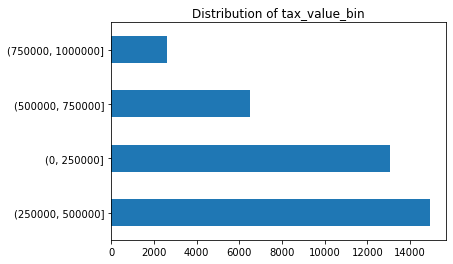

In [67]:
train.tax_value_bin.value_counts().plot.barh(title='Distribution of tax_value_bin')

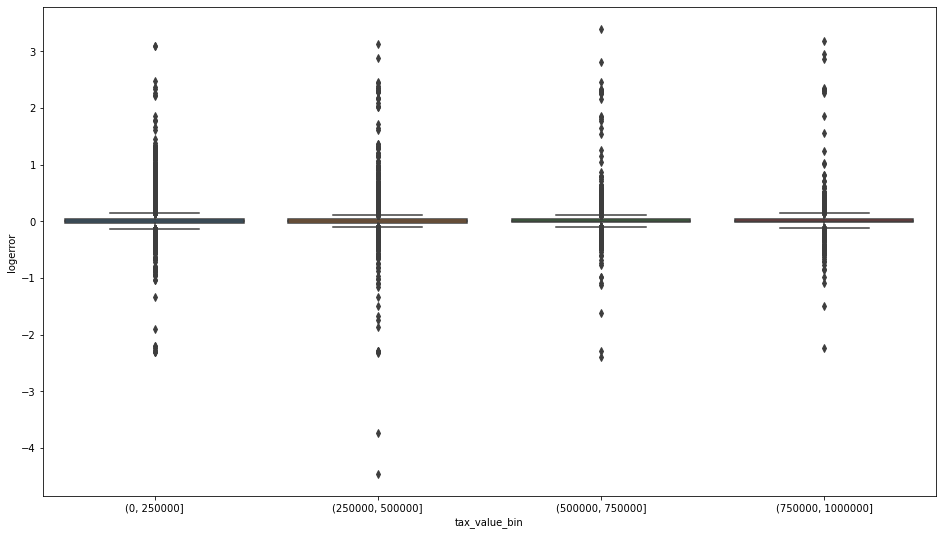

In [68]:
plt.figure(figsize=(16,9))
sns.boxplot(data=train, y='logerror', x='tax_value_bin')
plt.show()

In [69]:
#H0: Variances are equal
#Ha: Variances are not equal

stats.levene(
    train[train.taxvaluedollarcnt <= 500000].logerror,
    train[train.taxvaluedollarcnt > 500000].logerror,
)

LeveneResult(statistic=2.784190419592654, pvalue=0.09520655674119714)

In [70]:
stats.ttest_ind(
    train[train.taxvaluedollarcnt <= 500000].logerror,
    train[train.taxvaluedollarcnt > 500000].logerror,
    equal_var=False,
)

Ttest_indResult(statistic=-0.6503961666411069, pvalue=0.5154435142281439)

## Checking and testing with region zipcode for logerror

In [53]:
train.regionidzip.mean()

96589.7149873493

In [54]:
train.logerror.mean()

0.016537740386193833

In [60]:
train.regionidzip.value_counts()

97319.0    484
96987.0    414
97318.0    391
97118.0    341
96974.0    328
          ... 
95988.0      2
96329.0      2
96973.0      2
97092.0      1
96039.0      1
Name: regionidzip, Length: 384, dtype: int64

In [86]:
logmean = train[train.regionidzip == 97319].logerror.mean()

In [85]:
zipcodes_logerror_list = []
zipcodes_logerror = train.groupby("regionidzip").logerror.mean()
zipcodes_logerror_list = zipcodes_logerror.values
#zipcodes_logerror_list

0.009883055548783656
0.015022967920380506
-0.030112067169708084
-0.04621545303086365
0.011974799680187912
-0.01499595669651518
-0.008850048299500007
-0.03830327761634603
0.023302700611146667
0.03790421509693829
-0.014043738784578335
-0.009860331607312103
-0.09151556033171833
0.018526619371232858
-0.014665543300107232
-0.01650055802412143
0.02522226580111109
0.05832053463354097
0.014011288277356588
0.025687043197
0.025063537785380816
0.08807692202483412
0.009645651474956678
-0.0028354947411798276
-0.01271011941458111
0.008272031503410826
-0.03431169491583116
0.004150091778446676
-0.013340619474225515
0.007100160371586934
-0.02706529819539626
0.01399744442912377
-0.010763922071525201
0.008580137980215903
-0.0010256344261531797
-0.138529973381651
-0.041782721815273205
0.06821053991426888
-0.011148854692452456
0.008748931967125917
0.031199095903774312
0.026782412794520035
0.0007506906032187489
0.0594806728994179
0.006965168454105393
0.011732839888572101
0.04127749242616943
0.02431745548460

In [82]:
def zip_ttest(zipcodes, mean_of_logerror):
    
    pvalue_list = []
    
    for i in zipcodes:
        Stat, Pvalue = stats.ttest_ind(i, mean_of_logerror)
        pvalue_list.append(Pvalue)

    return pvalue_list

In [87]:
pvalue_list = zip_ttest(zipcodes_logerror_list, logmean)
pvalue_list

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan